<h1>Linear Regression</h1>
<p>This notebook provides an example code of analyzing <b>Customer lifetime value</b> using linear regression. The dependent variable which we will use in OLS model is <b>Customer lifetime value</b>. We would like to understand the realtionship between CLV and other variables in the dataset.
    
The general sequence of steps that we will follow is the following:
<ol>
<li>Describing the data (checking for NAs, outliers,summary statistics of our variables, etc)
<li>Do statistical testing (<b>T-test</b>) if needed
<li>Checking for correlations between the variables, and drop one of correlated variables 
<li>Visualize the relationship between dependent variable (CLV) and some of variables which are highly correlated to CLV
<li>Construct the OLS model using statsmodel package
<li>Get summary of the model
<li>Interpret the results
</ol>
</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
import seaborn as sns
import numpy as np

In [2]:
#read the data
data=pd.read_excel("CLV.xlsx")

<h2>Description of data</h2>

In [3]:
#lets see how the data looks 
data.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
#let's check for NA's
data.isnull().values.any()

False

In [5]:
#let's get info about all the variables and the types of them
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer_Lifetime_Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective_To_Date                9134 non-null datetime64[ns]
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location_Code                    9134 non-null object
Marital_Status                   9134 non-null object
Monthly_Premium_Auto             9134 non-null int64
Months_Since_Last_Claim          9134 non-null int64
Months_Since_Policy_Inception    9134 non-null int64
Number_of_Open_Complaints        9134 non-null int64
Number_of_Policies       

In [6]:
#Getting summary statistics of numeric variables
data.describe()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


<p>
    As can be seen from the summary, we have information about 9134 customers.Average lifetime value of customers is about 8005 dollars. However, the maximum value is over 83325 dollars, minimum value is 1898 dollars and the standard deviation is a quite high number making about 6871 dollars. Moreover, 75% of our customers has CLV less than 8962.16 dollars, this means that Pareto's rule is also working here, i.e. only small proportion of customers creats the highest value for the company. 
In addition, this gives us insight that we should have outliers there, and in our further steps we should also check for outliers.  
    <i><b>You can do similiar claims about the other variables as well.</b></i></p>

In [7]:
#let's separate numeric and object variables, we will exclude dates as well
data_numeric = data.select_dtypes(exclude=["object",'datetime64'])
data_object = data.select_dtypes(include="object")

In [8]:
#let's check variables with zero variance(i.e. we have same values for all observations), 
#if there is any we will not include in our further analysis
data_numeric.var()==0

Customer_Lifetime_Value          False
Income                           False
Monthly_Premium_Auto             False
Months_Since_Last_Claim          False
Months_Since_Policy_Inception    False
Number_of_Open_Complaints        False
Number_of_Policies               False
Total_Claim_Amount               False
dtype: bool

In [9]:
#let's check all the object variables with more than 1 unique value, 
#if there is any variable with 1 or 0 unique value(above we already checked that we don't have NAs), we will exclude it from further analysis
for i in data_object.columns:
    len(data_object[i].unique())>1
    print(data_object[i].unique())

['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
['Offer1' 'Offer3' 'Offer2' 'Offer4']
['Agent' 'Call Center' 'Web' 'Branch']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
['Medsize' 'Small' 'Large']


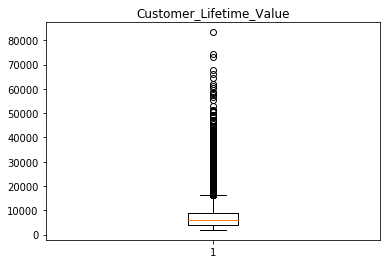

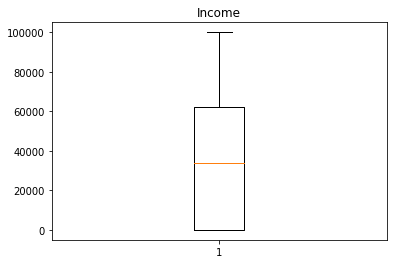

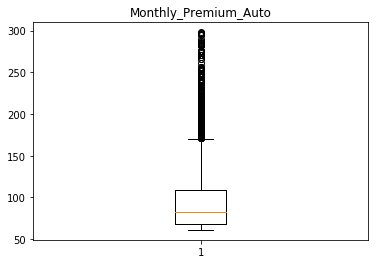

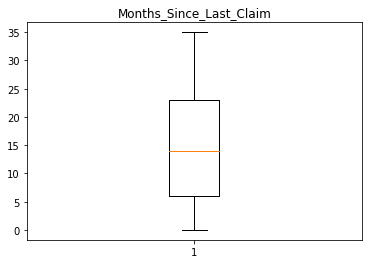

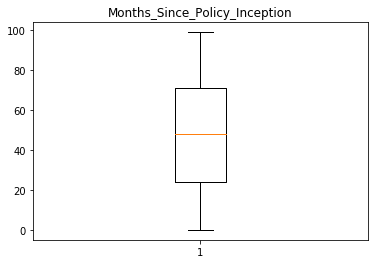

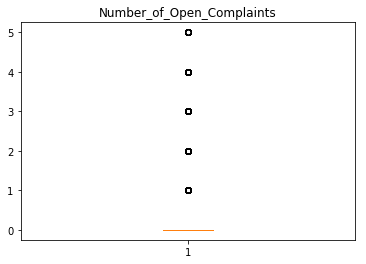

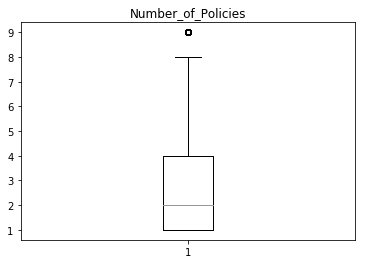

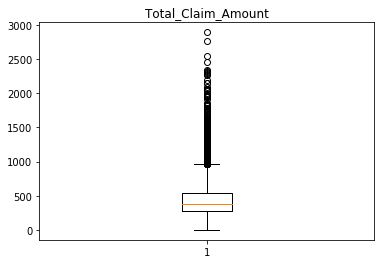

In [10]:
#observe outliers visually
for i in data_numeric.columns:
  plt.boxplot(data_numeric[i])
  plt.title(i)
  plt.show()

<h2>Independent T-test</h2>

In [11]:
#as in dataset we have gender, let's see whether there is significant difference of average CLV between male and female customers
stats.ttest_ind(data_numeric.Customer_Lifetime_Value[data_object.Gender=="F"],
               data_numeric.Customer_Lifetime_Value[data_object.Gender=="M"])

Ttest_indResult(statistic=1.300686352501256, pvalue=0.19339865630769232)

As we can see from the results of T=test, average CLV is not significantly different for male and female customers as p-value is above the 5% significance level. 

<h2>Checking for correlations</h2>

In [12]:
#let's get correlations between variables
data_numeric.corr()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
Customer_Lifetime_Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly_Premium_Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months_Since_Last_Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months_Since_Policy_Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number_of_Open_Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number_of_Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total_Claim_Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


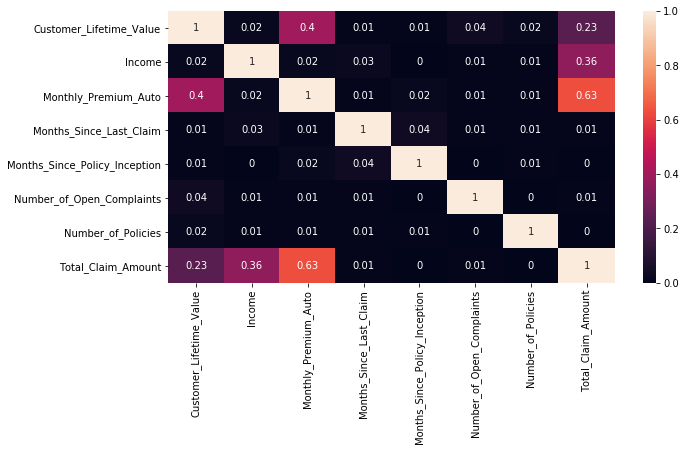

In [13]:
#Let's visualize correlations
plt.figure(figsize=(10,5))
sns.heatmap(data_numeric.corr().abs().round(2),annot=True)

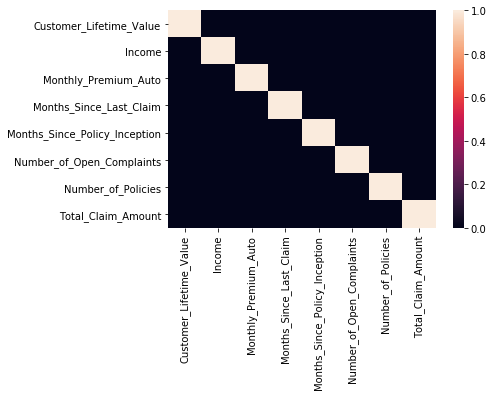

In [14]:
#plot correlation heatmap to see any correlations above or equal to 75% in absolute values
#we will see that no group of vars satisfy the condition, i.e. no high correlation
sns.heatmap(data_numeric.corr().abs()>=0.75)

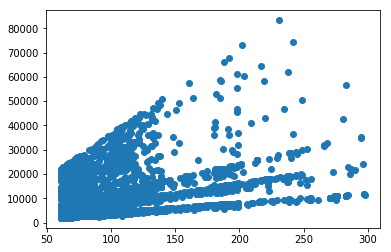

In [15]:
#as can be seen from the first heatmap, CLV has the highest correlation with Monthly Premium Auto
plt.scatter(data_numeric.Monthly_Premium_Auto,data_numeric.Customer_Lifetime_Value)

<h2>Ordinary Least Squaire Model</h2>

In [16]:
#after making necessary changes in numeric and object datasets(in our example no change was needed), we will combine back the datasets
data_new=data_numeric.join(data_object,how='outer')

In [17]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
Customer_Lifetime_Value          9134 non-null float64
Income                           9134 non-null int64
Monthly_Premium_Auto             9134 non-null int64
Months_Since_Last_Claim          9134 non-null int64
Months_Since_Policy_Inception    9134 non-null int64
Number_of_Open_Complaints        9134 non-null int64
Number_of_Policies               9134 non-null int64
Total_Claim_Amount               9134 non-null float64
Customer                         9134 non-null object
State                            9134 non-null object
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Location_Code                    9134 non-null object
Marital_Status                   

In [18]:
#let's create a list from names of variables (except CLV)
vars=data_new.columns.tolist()
vars

['Customer_Lifetime_Value',
 'Income',
 'Monthly_Premium_Auto',
 'Months_Since_Last_Claim',
 'Months_Since_Policy_Inception',
 'Number_of_Open_Complaints',
 'Number_of_Policies',
 'Total_Claim_Amount',
 'Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location_Code',
 'Marital_Status',
 'Policy_Type',
 'Policy',
 'Renew_Offer_Type',
 'Sales_Channel',
 'Vehicle_Class',
 'Vehicle_Size']

In [19]:
#let's exclude CLV and Customer ID
del vars[0]
del vars[7]

In [20]:
#as there are many variables, not to input all manually let's create formula 
formula="+".join(vars)
formula="Customer_Lifetime_Value~"+formula
formula

'Customer_Lifetime_Value~Income+Monthly_Premium_Auto+Months_Since_Last_Claim+Months_Since_Policy_Inception+Number_of_Open_Complaints+Number_of_Policies+Total_Claim_Amount+State+Response+Coverage+Education+EmploymentStatus+Gender+Location_Code+Marital_Status+Policy_Type+Policy+Renew_Offer_Type+Sales_Channel+Vehicle_Class+Vehicle_Size'

In [21]:
#as there are not variables highly correlated, first lets include all the explaining variables in the model
model_ols1=ols(formula=formula, data=data_new)

In [22]:
#let's see the summary of the results now
#let's look at R-squared and p-values
results = model_ols1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer_Lifetime_Value   R-squared:                       0.169
Model:                                 OLS   Adj. R-squared:                  0.165
Method:                      Least Squares   F-statistic:                     38.60
Date:                     Sat, 29 Sep 2018   Prob (F-statistic):          6.92e-323
Time:                             18:42:19   Log-Likelihood:                -92812.
No. Observations:                     9134   AIC:                         1.857e+05
Df Residuals:                         9085   BIC:                         1.861e+05
Df Model:                               48                                         
Covariance Type:                 nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          1486.6386    903.661      1.645      0.100    -284.740    3258.017
State[T.California]                  39.9647    189.426      0.211      0.833    -331.354     411.283
State[T.Nevada]                      45.7021    261.160      0.175      0.861    -466.231     557.635
State[T.Oregon]                      84.9912    196.050      0.434      0.665    -299.312     469.294
State[T.Washington]                 164.3324    269.980      0.609      0.543    -364.888     693.553
Response[T.Yes]                    -215.9162    207.436     -1.041      0.298    -622.538     190.705
Coverage[T.Extended]                130.1678    249.287      0.522      0.602    -358.490     618.826
Coverage[T.Premium]                  61.7491    527.605      0.117      0.907    -972.476    1095.974
Education[T.College]                 -1.5962    171.219     -0.009      0.993    -337.225     334.032
Education[T.Doctor]                -197.9744    362.976     -0.545      0.585    -909.488     513.540
Education[T.High School or Below]   388.9735    173.415      2.243      0.025      49.041     728.906
Education[T.Master]                 157.9503    262.899      0.601      0.548    -357.390     673.291
EmploymentStatus[T.Employed]        700.4418    354.477      1.976      0.048       5.587    1395.296
EmploymentStatus[T.Medical Leave]   210.8226    436.143      0.483      0.629    -644.116    1065.761
EmploymentStatus[T.Retired]          64.6393    502.732      0.129      0.898    -920.829    1050.108
EmploymentStatus[T.Unemployed]        9.1563    357.613      0.026      0.980    -691.846     710.158
Gender[T.M]                        -143.5239    132.973     -1.079      0.280    -404.181     117.133
Location_Code[T.Suburban]           -73.7895    263.381     -0.280      0.779    -590.076     442.497
Location_Code[T.Urban]              128.8756    241.416      0.534      0.593    -344.355     602.106
Marital_Status[T.Married]          -177.6388    194.800     -0.912      0.362    -559.490     204.212
Marital_Status[T.Single]           -490.7108    225.714     -2.174      0.030    -933.161     -48.260
Policy_Type[T.Personal Auto]       -305.6726    256.741     -1.191      0.234    -808.943     197.598
Policy_Type[T.Special Auto]         165.6132    362.670      0.457      0.648    -545.301     876.527
Policy[T.Corporate L2]            -1007.2895    420.508     -2.395      0.017   -1831.581    -182.998
Policy[T.Corporate L3]             -668.9524    386.386     -1.731      0.083   -1426.357      88.452
Policy[T.Personal L1]              -161.3307    163.621     -0.986      0.324    -482.065     159.404
Policy[T.Personal L2]                -6.5954    141.822     -0.047    

In [23]:
#as can be seen from the summary of model_ols1, there are some variables for which p-values are very high,
#let's remove one of them and see what will happen to Adj. R-squared
#lets remove "vars.remove("EmploymentStatus")
vars.remove("EmploymentStatus")
formula2="+".join(vars)
formula2="Customer_Lifetime_Value~"+formula2

In [24]:
model_ols2=ols(formula=formula2, data=data_new).fit()
model_ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer_Lifetime_Value   R-squared:                       0.169
Model:                                 OLS   Adj. R-squared:                  0.165
Method:                      Least Squares   F-statistic:                     41.91
Date:                     Sat, 29 Sep 2018   Prob (F-statistic):               0.00
Time:                             18:42:20   Log-Likelihood:                -92816.
No. Observations:                     9134   AIC:                         1.857e+05
Df Residuals:                         9089   BIC:                         1.860e+05
Df Model:                               44                                         
Covariance Type:                 nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          1590.4740    853.395      1.864      0.062     -82.372    3263.320
State[T.California]                  39.6144    189.448      0.209      0.834    -331.747     410.976
State[T.Nevada]                      46.4582    261.207      0.178      0.859    -465.567     558.483
State[T.Oregon]                      85.0664    196.093      0.434      0.664    -299.320     469.453
State[T.Washington]                 168.6004    270.022      0.624      0.532    -360.703     697.904
Response[T.Yes]                    -245.7678    199.422     -1.232      0.218    -636.681     145.145
Coverage[T.Extended]                136.1989    249.270      0.546      0.585    -352.427     624.825
Coverage[T.Premium]                  62.4054    527.632      0.118      0.906    -971.872    1096.683
Education[T.College]                  0.4996    171.217      0.003      0.998    -335.125     336.124
Education[T.Doctor]                -186.0049    362.730     -0.513      0.608    -897.036     525.027
Education[T.High School or Below]   382.8178    173.425      2.207      0.027      42.866     722.770
Education[T.Master]                 169.9766    262.714      0.647      0.518    -345.003     684.956
Gender[T.M]                        -138.1516    132.886     -1.040      0.299    -398.639     122.336
Location_Code[T.Suburban]           -76.0815    261.830     -0.291      0.771    -589.327     437.164
Location_Code[T.Urban]              158.3861    240.817      0.658      0.511    -313.670     630.442
Marital_Status[T.Married]          -161.5800    194.217     -0.832      0.405    -542.288     219.128
Marital_Status[T.Single]           -527.6955    221.259     -2.385      0.017    -961.414     -93.977
Policy_Type[T.Personal Auto]       -308.5694    256.793     -1.202      0.230    -811.940     194.802
Policy_Type[T.Special Auto]         159.0263    362.722      0.438      0.661    -551.990     870.043
Policy[T.Corporate L2]            -1000.7297    420.502     -2.380      0.017   -1825.009    -176.451
Policy[T.Corporate L3]             -672.4366    386.470     -1.740      0.082   -1430.004      85.131
Policy[T.Personal L1]              -165.1012    163.633     -1.009      0.313    -485.859     155.657
Policy[T.Personal L2]                -8.3864    141.821     -0.059      0.953    -286.388     269.615
Policy[T.Personal L3]              -135.0818    128.642     -1.050      0.294    -387.249     117.085
Policy[T.Special L1]                 26.7975    613.784      0.044      0.965   -1176.357    1229.952
Policy[T.Special L2]               -346.1329    443.897     -0.780      0.436   -1216.271     524.006
Policy[T.Special L3]                478.3617    458.230      1.044    

<b>We can repeat the process several times and in the end keep only statistically significant variables.</b>